In [1]:
%matplotlib inline


In [2]:
from visualizations.embeddings import plot_embeddings_of_rotated_image, visualise_dimreduced_embeddings
from visualizations.feature_maps import plot_feature_maps
from visualizations.spatial_transform_grid import visualize_transform_grid, visualise_digit_transform


In [3]:
input_config = {
    "C": 1,
    "H": 28,
    "W": 28
}

output_config = {
    "C": 10
}


In [4]:
experiment_config = {
    "batch_size": 32,
    "max_epochs": 20,
    "log_every_n_steps": 100,
    "patience": 5,
    "rotate_train": False,
    "rotate_test": True,
    "seed": 420,
    "runs": 3,
}

optimizer_hparams = {
    "lr": 1e-2,
    "weight_decay": 1e-4
}


In [5]:
import torch
import pytorch_lightning as pl
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

pl.seed_everything(experiment_config["seed"], workers=True)


Global seed set to 420


420

In [6]:
datasets_root_path = "./datasets"


In [7]:
from loaders import get_loaders

train_loader, val_loader, test_loader = get_loaders(
    datasets_root_path=datasets_root_path,
    experiment_config=experiment_config
)


In [8]:
model_name = "STCNN"
model_hparams = {
    "mode": "multi",
    "in_channels": input_config["C"],
    "out_channels": output_config["C"],
    "channels": 64,
    "localization_channels": 37,
    "conv_layers": 5,
    "kernel_size": 5,
    "localization_initialization_mode": "identity",
    "transformation_mode": "rotation",
}


In [9]:
target_checkpoint = "results/no-rotations/stcnns/checkpoint-run=2-STCNN-mode=multi-conv_layers=5-channels=64-loc_channels=37-kernel_size=5-loc_init=identity-transform=rotation-batch_size=32-lr=0.01-weight_decay=0.0001-max-epochs=20-seed=420.ckpt"


In [10]:
from torchinfo import summary
from modules.MNISTModule import MNISTModule


module = MNISTModule(
    model_name,
    model_hparams,
    optimizer_hparams
).load_from_checkpoint(target_checkpoint)

summary(
    module.model,
    input_size=(
        experiment_config["batch_size"],
        input_config["C"],
        input_config["H"],
        input_config["W"],
    )
)


/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. Th

Layer (type:depth-idx)                             Output Shape              Param #
STCNN                                              [32, 10]                  --
├─STConvBlock: 1-1                                 [32, 64, 24, 24]          --
│    └─STConv: 2-1                                 [32, 64, 24, 24]          --
│    │    └─LocalizationNet: 3-1                   [32, 2, 3]                35,262
│    │    └─Conv2d: 3-2                            [32, 64, 24, 24]          1,664
├─ModuleList: 1-8                                  --                        (recursive)
│    └─STConvBlock: 2-2                            [32, 64, 20, 20]          --
│    │    └─STConv: 3-3                            [32, 64, 20, 20]          196,001
├─ModuleList: 1-7                                  --                        --
│    └─MaxPool2d: 2-3                              [32, 64, 19, 19]          --
├─ModuleList: 1-8                                  --                        (recursive)
│    

In [11]:
from trainer import get_trainer
tester = get_trainer(experiment_config)


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


In [12]:
tester.test(module, test_loader)


/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/lightning_fabric/loggers/csv_logs.py:188: UserWarning: Experiment logs directory logs/lightning_logs/version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
  rank_zero_warn(
/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/gboduljak/.local/share/virtualenvs/geometric-deep-learning-7fBP83ZS/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.4747999906539917
        test_loss            4.883428573608398
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 4.883428573608398, 'test_acc': 0.4747999906539917}]

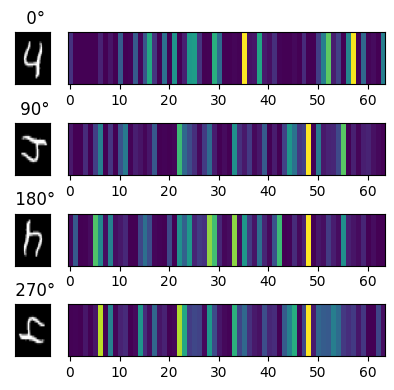

In [13]:
plot_embeddings_of_rotated_image(
    model=module.model,
    target_image=4,
    num_rotations=4,
    figsize=(4, 4)
)


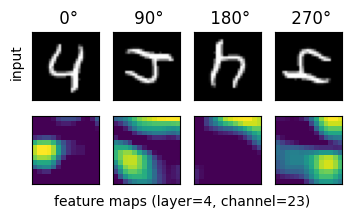

In [14]:
plot_feature_maps(
    model=module.model,
    target_image=4,
    num_rotations=4,
    layer=4,
    target_channel=23
)


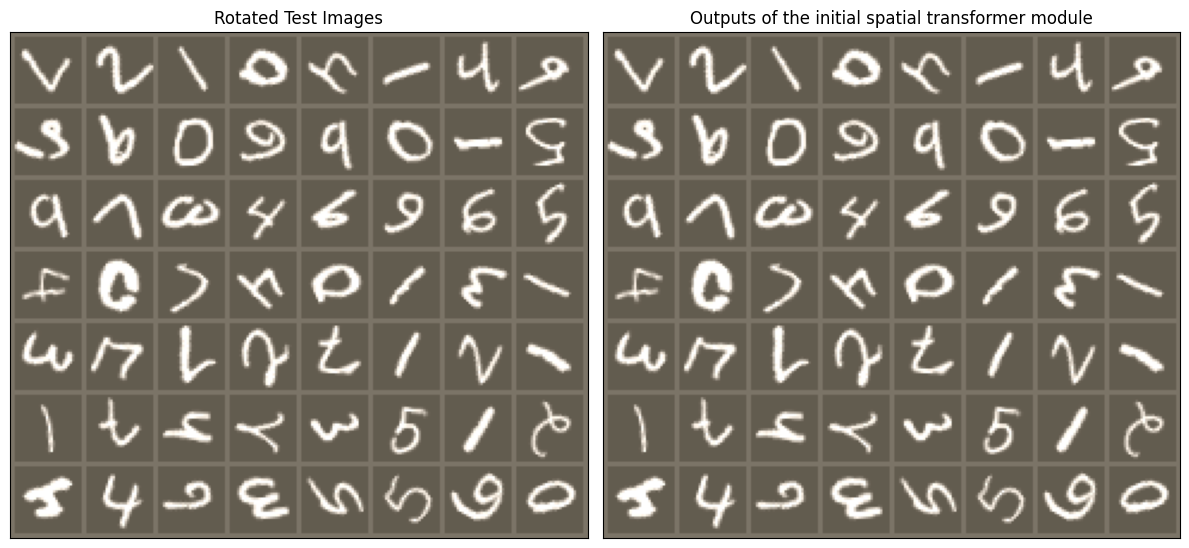

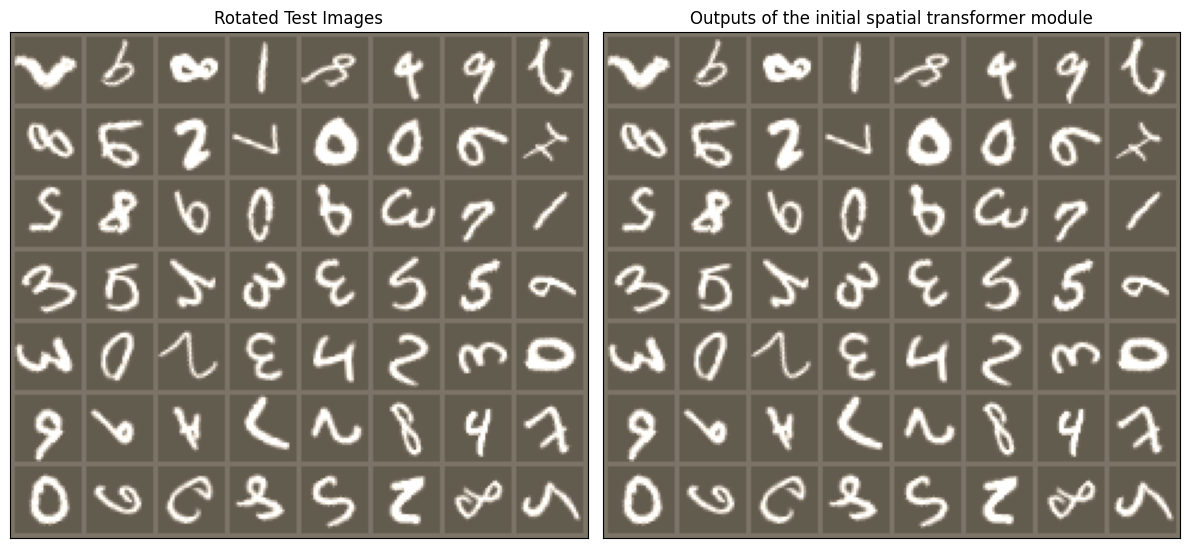

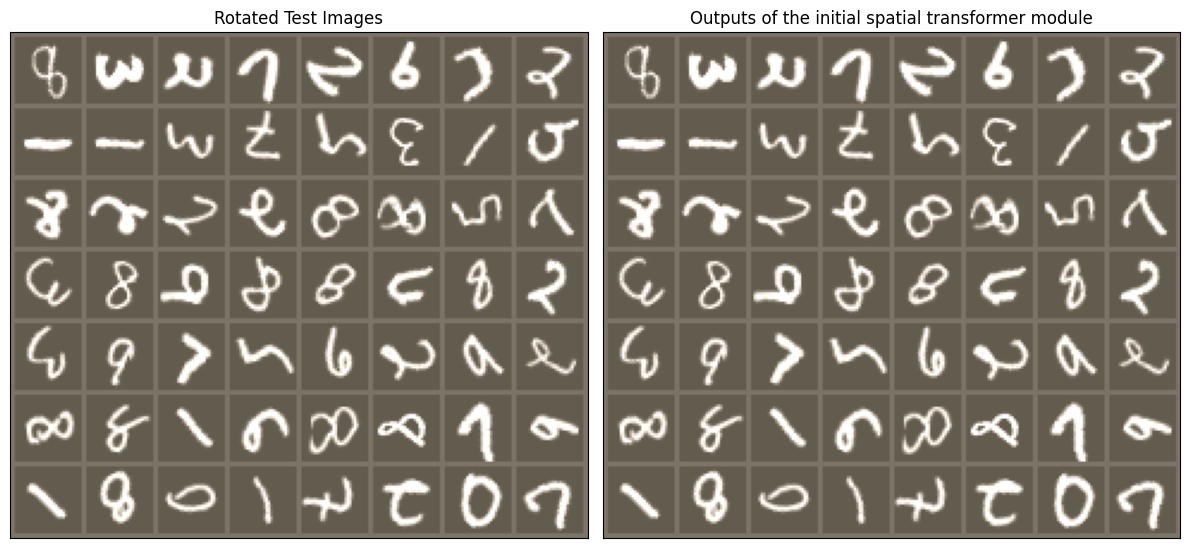

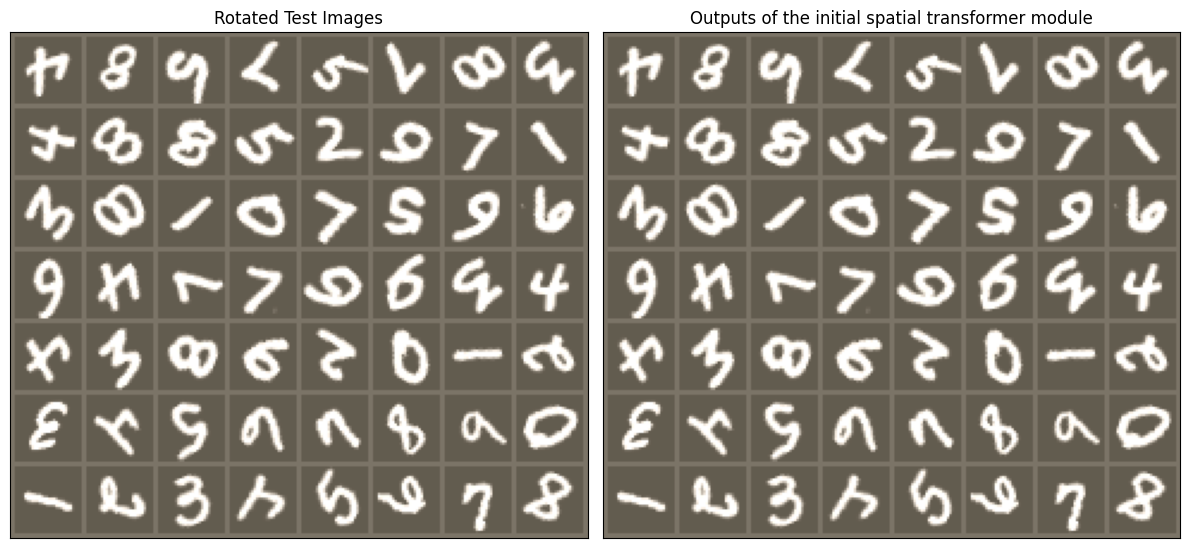

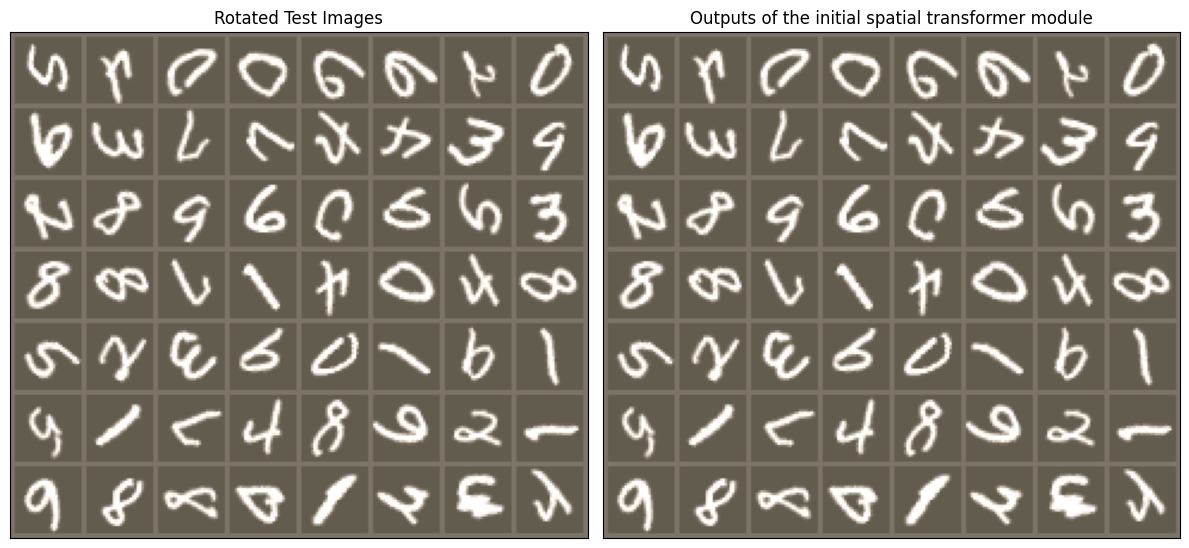

In [15]:
visualize_transform_grid(model=module.model, loader=test_loader,  num_batches=5)


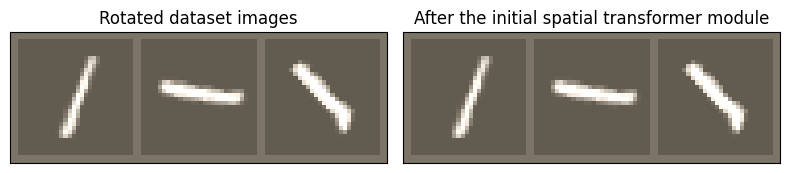

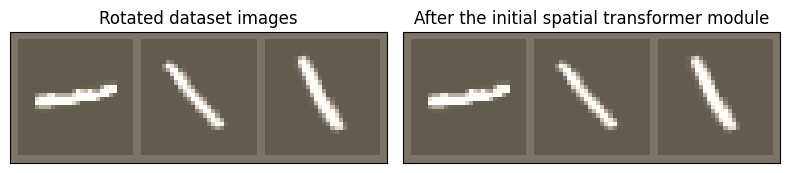

In [16]:
visualise_digit_transform(model=module.model, loader=test_loader)


<Figure size 800x800 with 0 Axes>

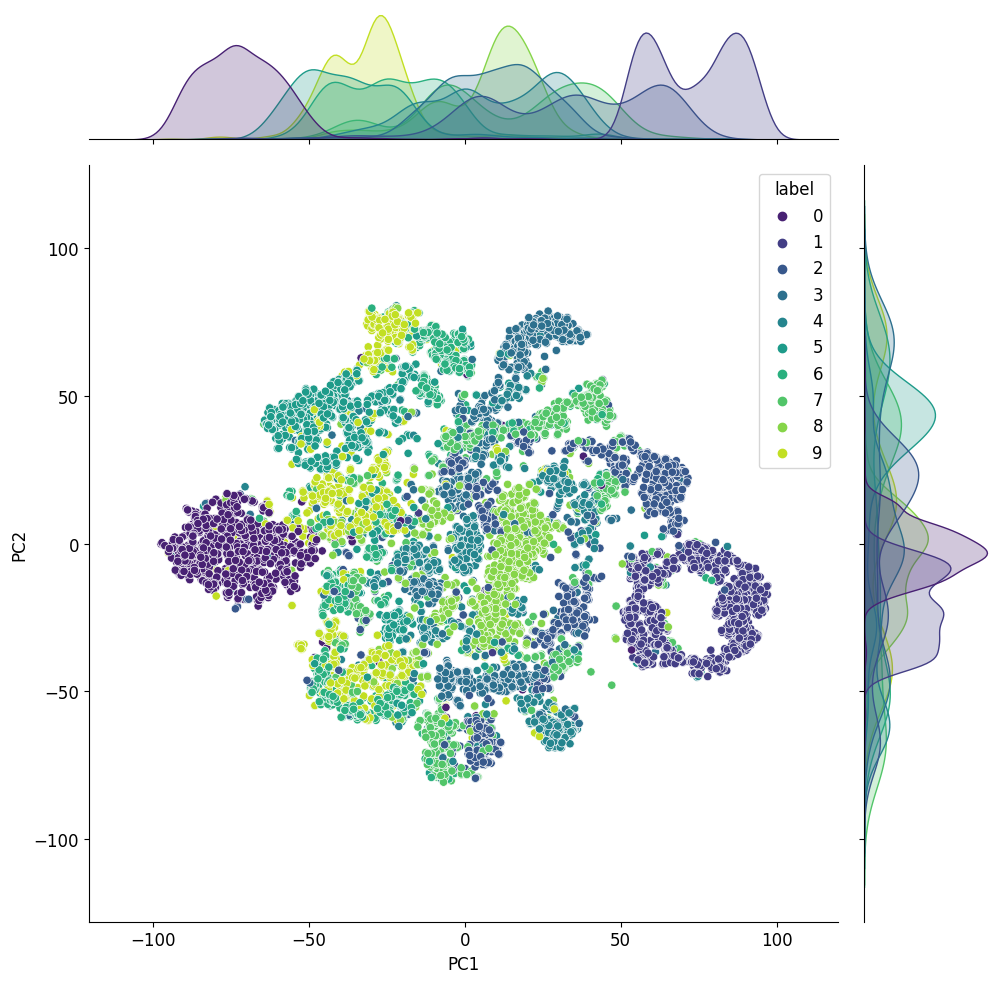

In [17]:
visualise_dimreduced_embeddings(model=module.model, loader=test_loader)
